1. train.csv
train 데이터 : 2019년 01월 01일부터 2023년 03월 03일까지의 유통된 품목의 가격 데이터
item: 품목 코드
TG : 감귤
BC : 브로콜리
RD : 무
CR : 당근
CB : 양배추
corporation : 유통 법인 코드
법인 A부터 F 존재
location : 지역 코드
J : 제주도 제주시
S : 제주도 서귀포시
supply(kg) : 유통된 물량, kg 단위
price(원/kg) : 유통된 품목들의 kg 마다의 가격, 원 단위
2. international_trade.csv
관련 품목 수출입 정보
중량 단위 kg
금액 단위 천 달러
3. test.csv
test 데이터 : 2023년 03월 04일부터 2023년 03월 31일까지의 데이터
4. sample_submission.csv
제출을 위한 양식
2023년 03월 04일부터 2023년 03월 31일까지의 price(원/kg)을 예측
ID는 품목, 유통 법인, 지역 코드로 구성된 식별자
해당 ID에 맞춰 price(원/kg) 예측값을 answer 컬럼에 기입해야 함
상세

In [116]:
import pandas as pd

train = pd.read_csv('./train.csv')
train = train.drop('ID', axis=1)
international_trade = pd.read_csv('./international_trade.csv')
sample_submission = pd.read_csv('./sample_submission.csv')
test = pd.read_csv('./test.csv')
# 35452 
# price: 35455
# for col in ['item','corporation','location','supply(kg)','price(원/kg)']:
#     print(train[col].value_counts())

In [117]:
from sklearn.preprocessing import OneHotEncoder
oneHotEncoder = OneHotEncoder(sparse=False)
data = {'timestamp': train['timestamp'].apply(lambda x: x.split('-')[1]),
        'item': train['item'],
        'corporation': train['corporation'],
        'location': train['location']}

df = pd.DataFrame(data)
encodedData = oneHotEncoder.fit_transform(df[['timestamp', 'item', 'corporation', 'location']])
df = pd.DataFrame(encodedData, columns=oneHotEncoder.get_feature_names_out(['timestamp', 'item', 'corporation', 'location']))
train = pd.concat([train.drop(columns=['timestamp', 'item', 'corporation', 'location']), df], axis=1)
train

/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,supply(kg),price(원/kg),timestamp_01,timestamp_02,timestamp_03,timestamp_04,timestamp_05,timestamp_06,timestamp_07,timestamp_08,...,item_RD,item_TG,corporation_A,corporation_B,corporation_C,corporation_D,corporation_E,corporation_F,location_J,location_S
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60601.0,1728.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,25000.0,1408.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32352.0,1250.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,452440.0,468.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
59393,421980.0,531.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
59394,382980.0,574.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
59395,477220.0,523.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [118]:
anomaly = train.loc[train['price(원/kg)']==0.0].index # 가격이 0원은 말이 안됨
# anomaly_2 = anomaly.loc[train['supply(kg)']!=0.0].index # 무게가 있는데 가격이 0원은 더 말이 안됨
train = train.drop(anomaly, axis=0) # 싹 drop
len(anomaly) # outlier가 너무 많은데..

35455

array([[<Axes: title={'center': 'supply(kg)'}>,
        <Axes: title={'center': 'price(원/kg)'}>,
        <Axes: title={'center': 'timestamp_01'}>,
        <Axes: title={'center': 'timestamp_02'}>,
        <Axes: title={'center': 'timestamp_03'}>],
       [<Axes: title={'center': 'timestamp_04'}>,
        <Axes: title={'center': 'timestamp_05'}>,
        <Axes: title={'center': 'timestamp_06'}>,
        <Axes: title={'center': 'timestamp_07'}>,
        <Axes: title={'center': 'timestamp_08'}>],
       [<Axes: title={'center': 'timestamp_09'}>,
        <Axes: title={'center': 'timestamp_10'}>,
        <Axes: title={'center': 'timestamp_11'}>,
        <Axes: title={'center': 'timestamp_12'}>,
        <Axes: title={'center': 'item_BC'}>],
       [<Axes: title={'center': 'item_CB'}>,
        <Axes: title={'center': 'item_CR'}>,
        <Axes: title={'center': 'item_RD'}>,
        <Axes: title={'center': 'item_TG'}>,
        <Axes: title={'center': 'corporation_A'}>],
       [<Axes: title={'

/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


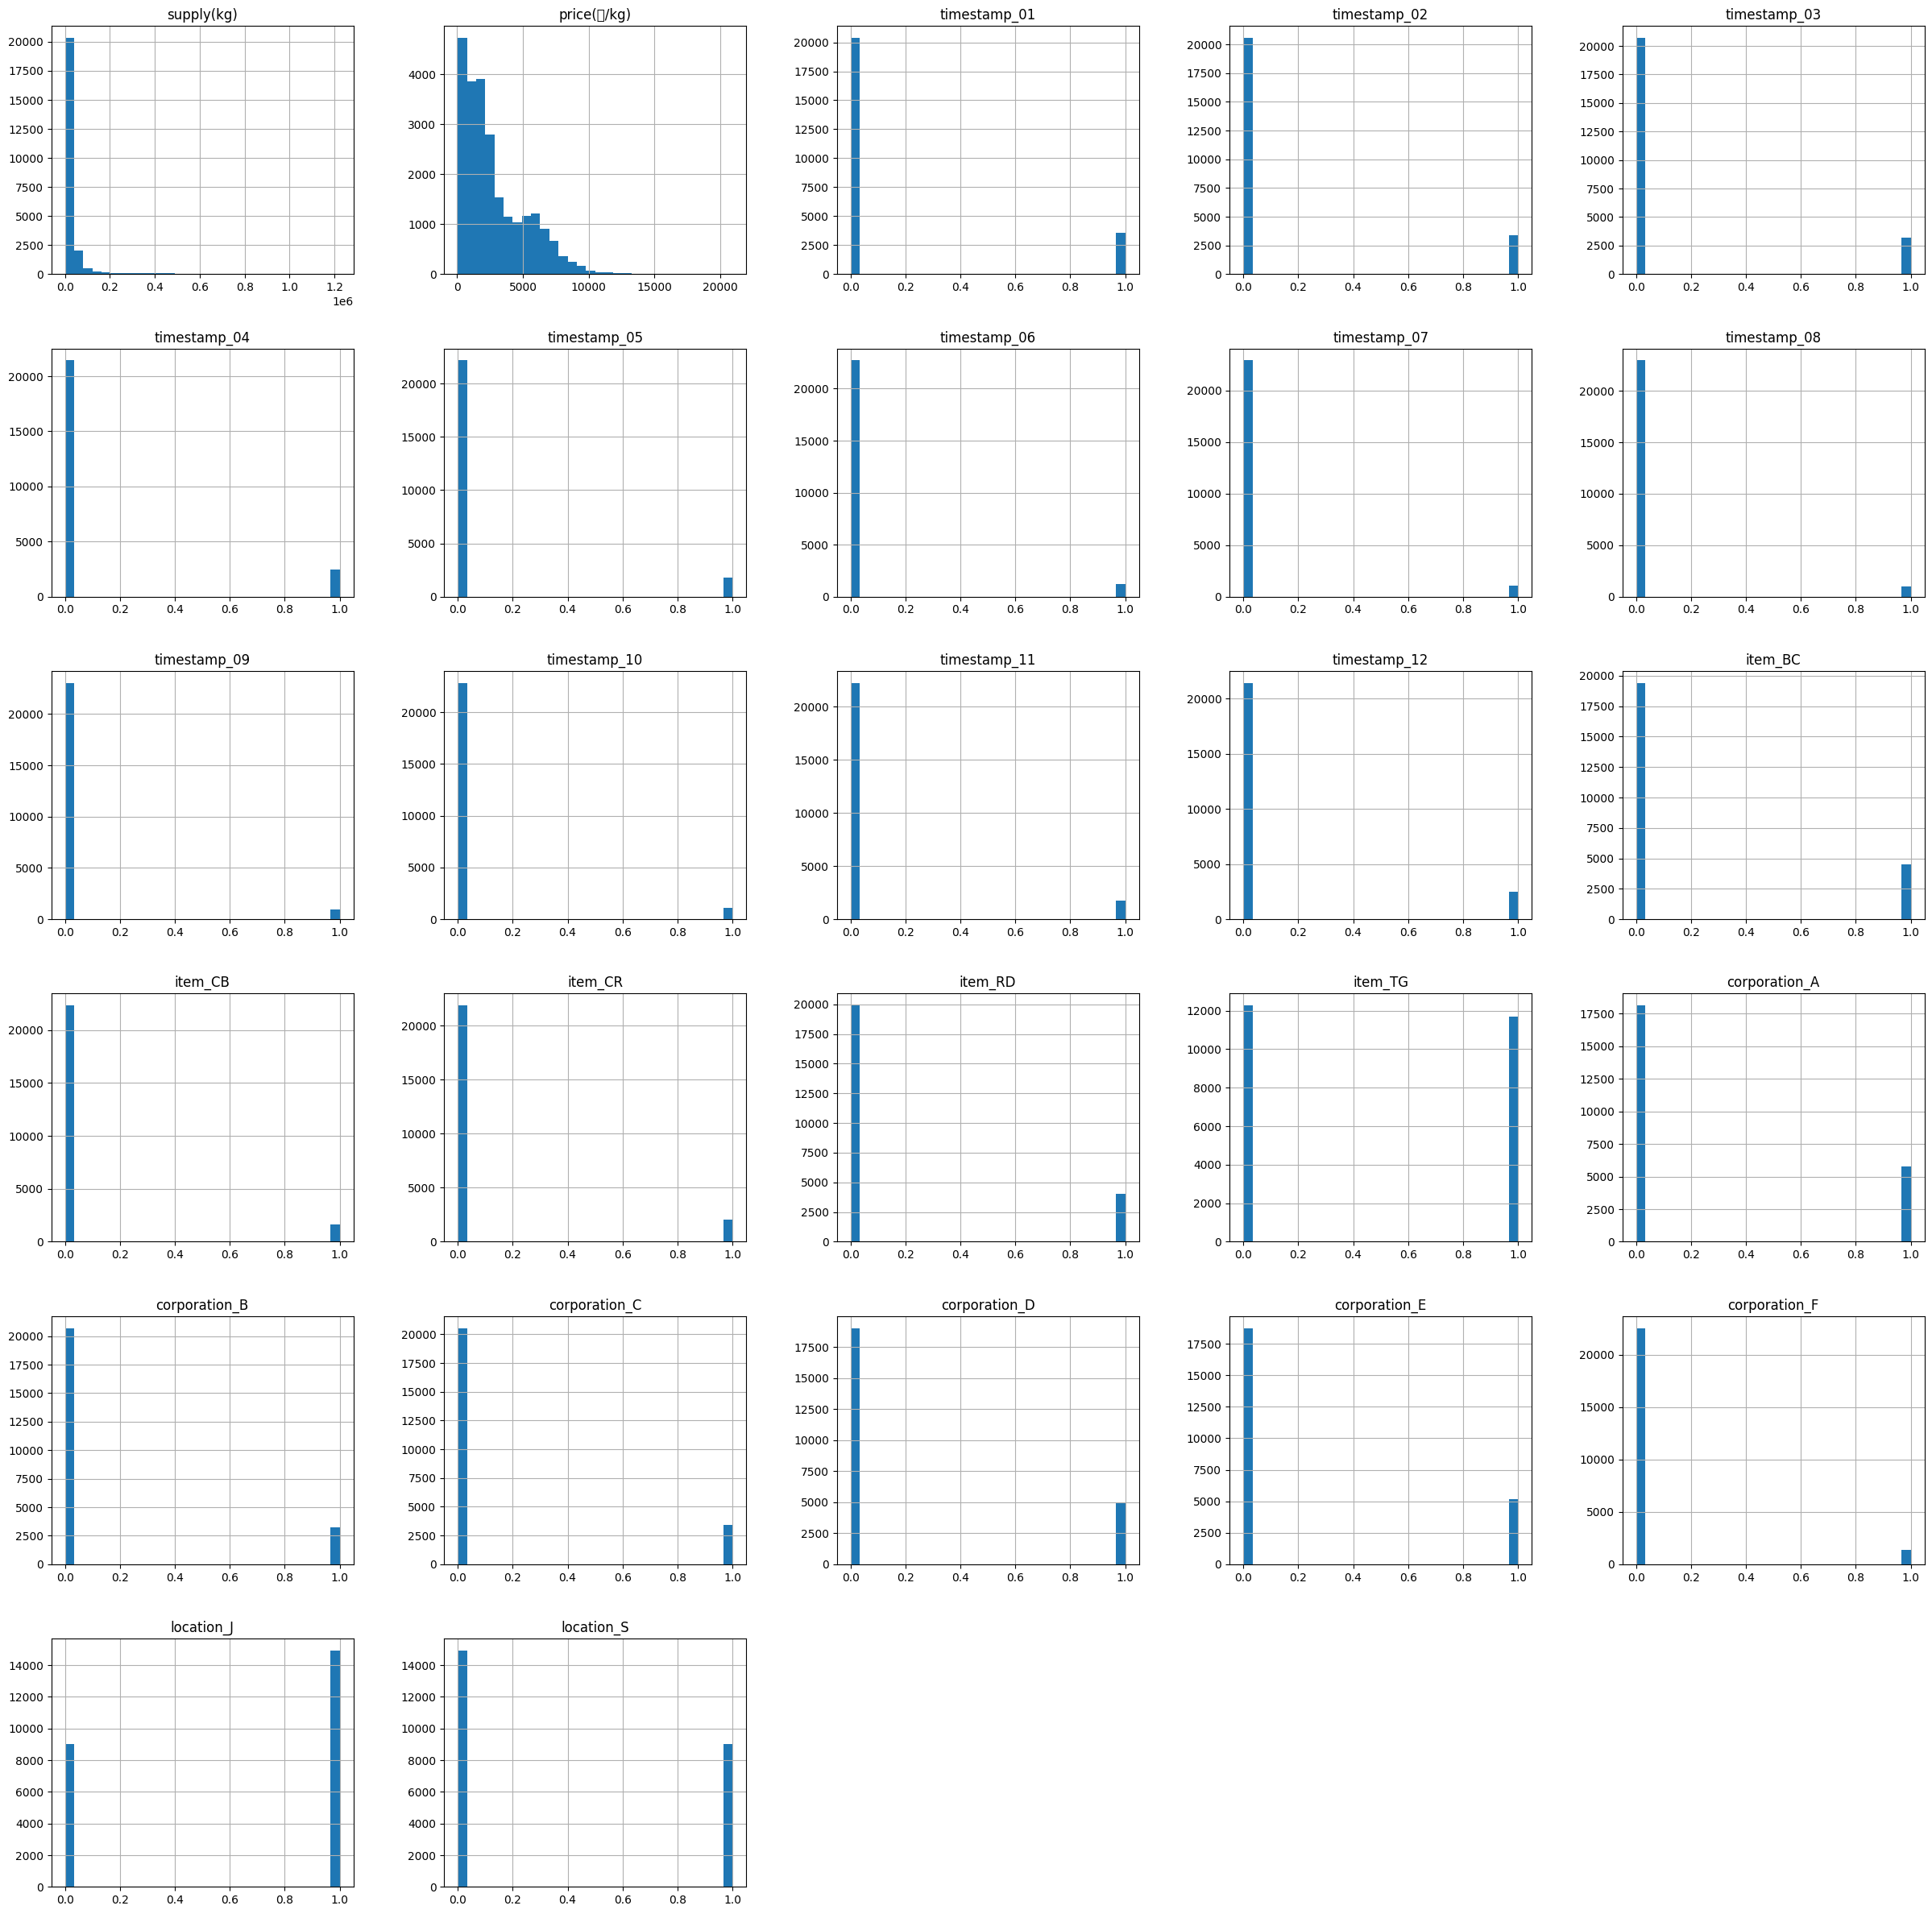

In [40]:
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt 
train.hist(figsize=(30,30), bins=30)
# plt.figure(figsize=(10, 7))  # 히트맵 크기 설정
# sns.heatmap(abs(corr_matrix), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title("상관관계 히트맵")
# plt.show()

/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from cu

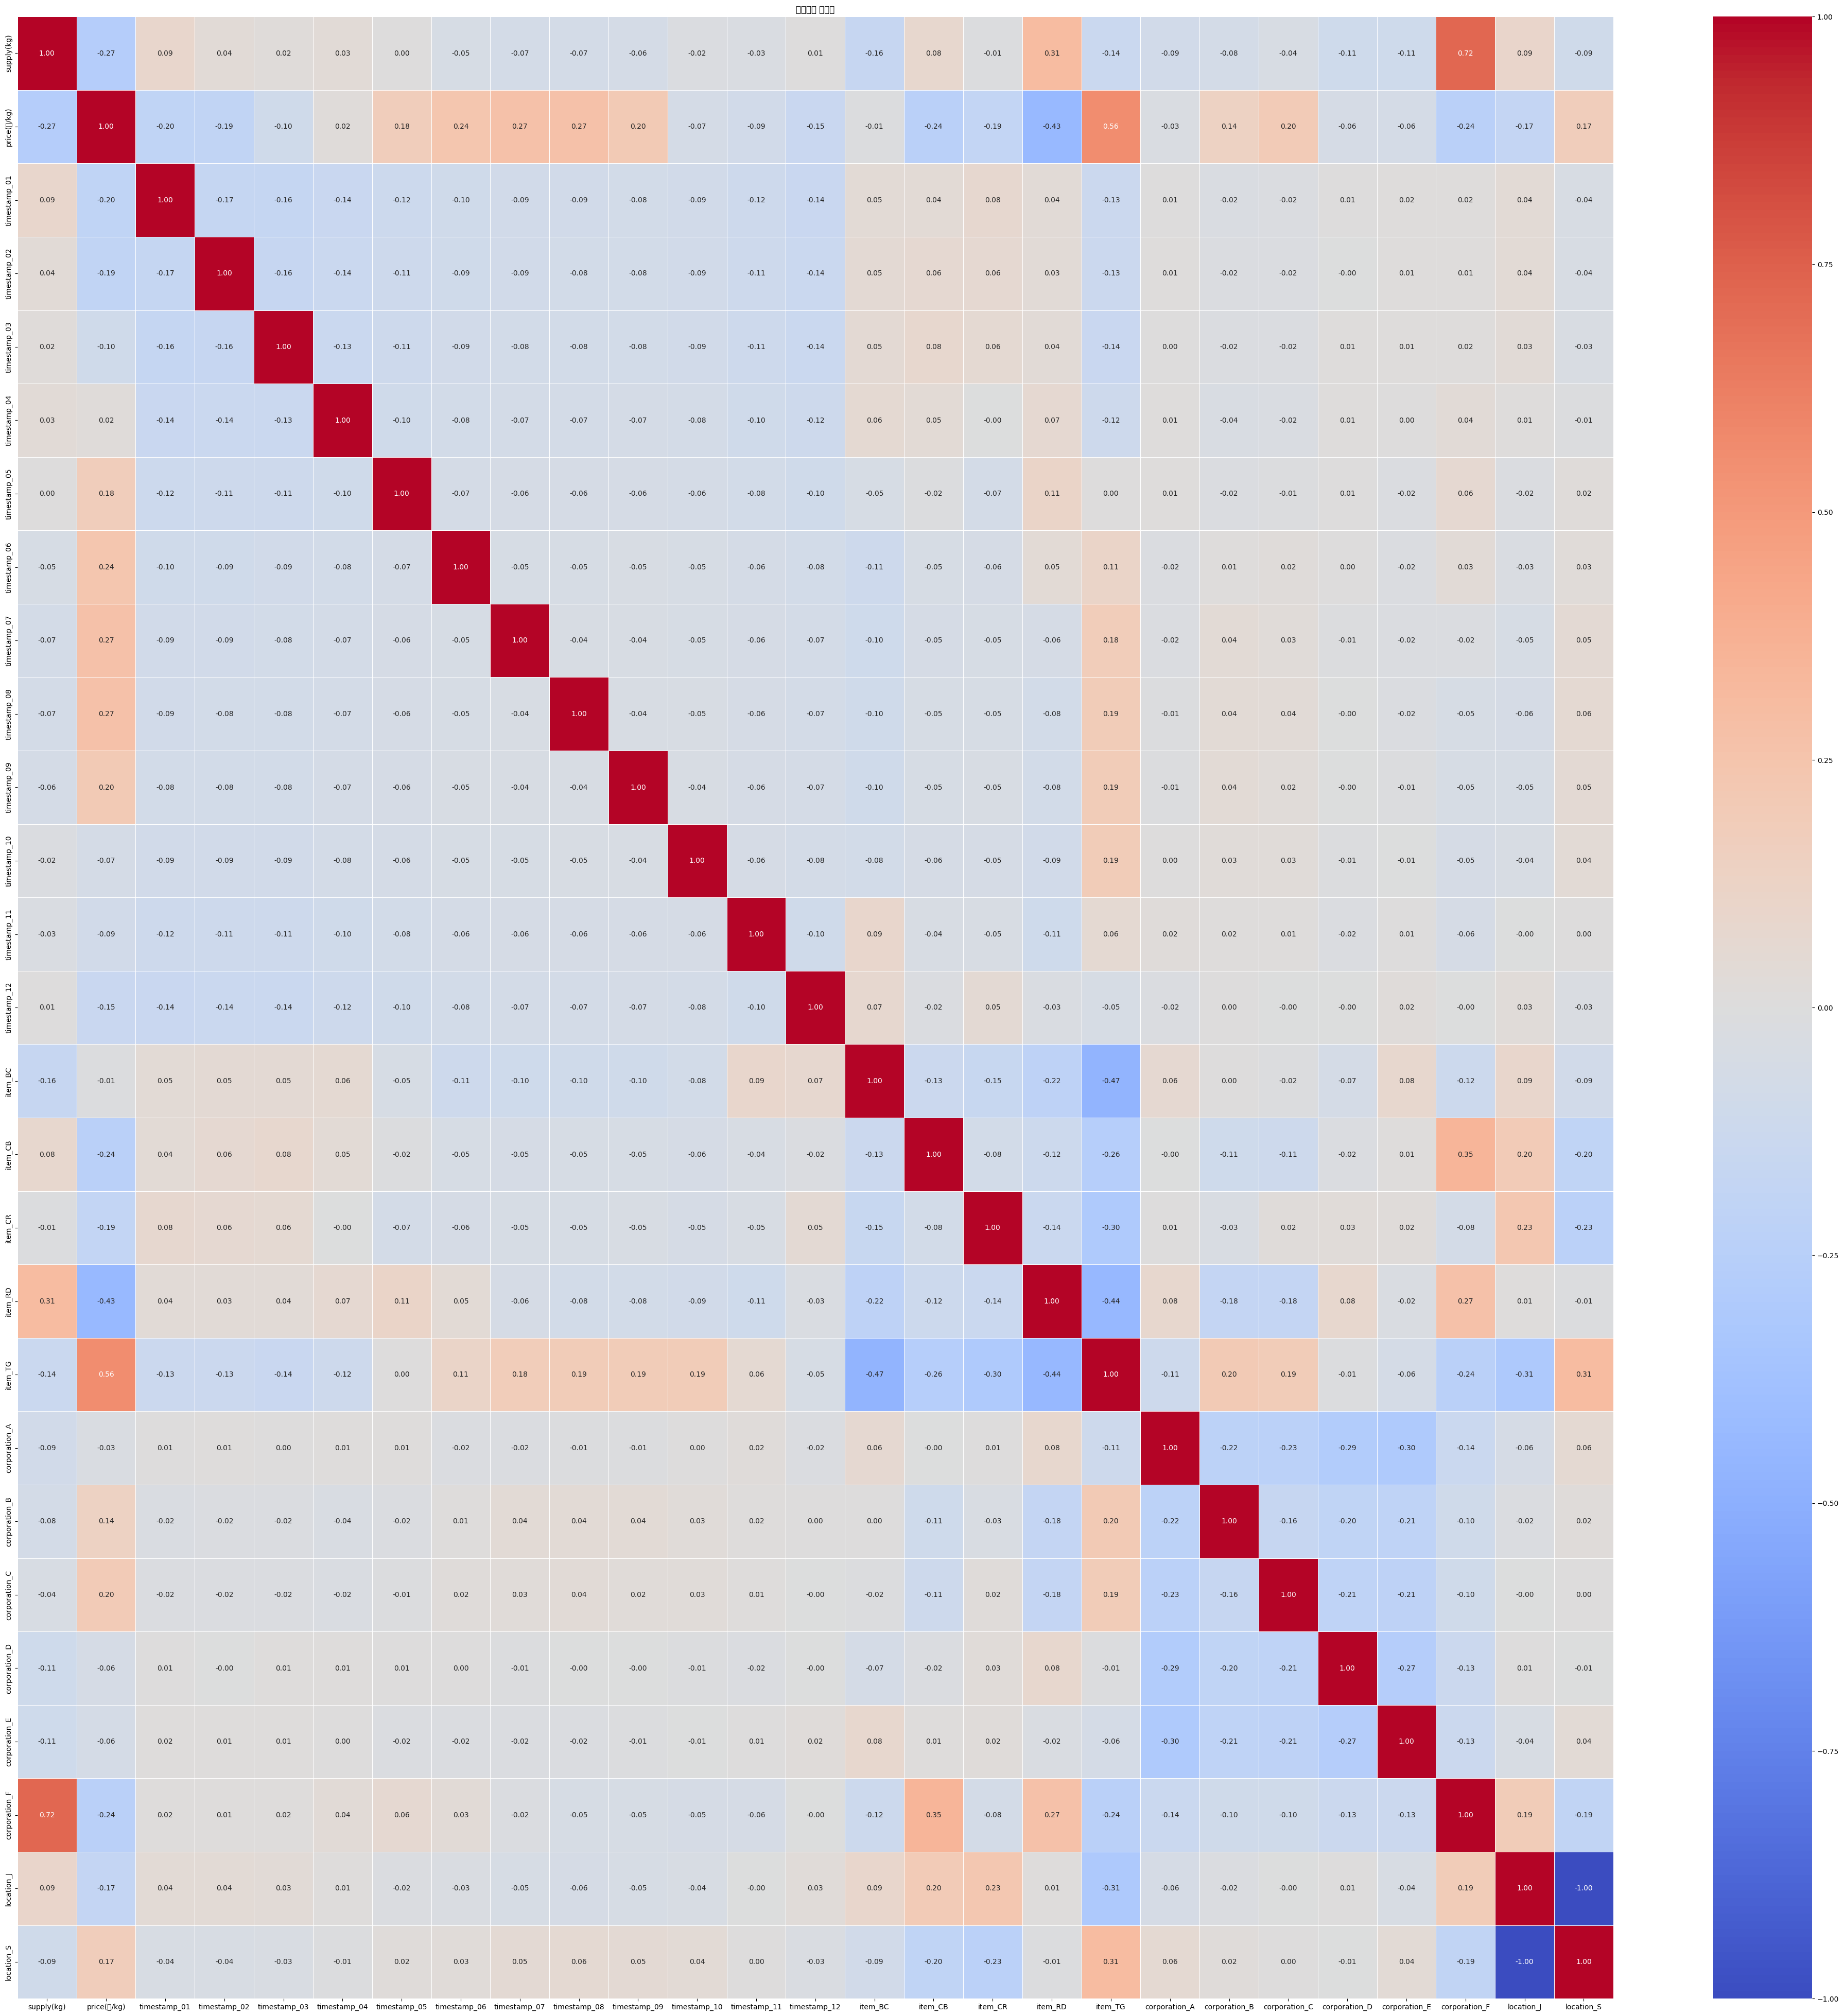

In [42]:
corr_matrix = train.corr()
corr_matrix['price(원/kg)'].sort_values(ascending=True)

# 상관관계 히트맵
import seaborn as sns

plt.figure(figsize=(50, 50))  # 히트맵 크기 설정
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("상관관계 히트맵")
plt.show()

In [119]:
# location은 s,i에 따라 별 영향 x
train = train.drop(['location_J', 'location_S'], axis=1)

In [46]:
train

,supply(kg),price(원/kg),timestamp_01,timestamp_02,timestamp_03,timestamp_04,timestamp_05,timestamp_06,timestamp_07,timestamp_08,...,item_CB,item_CR,item_RD,item_TG,corporation_A,corporation_B,corporation_C,corporation_D,corporation_E,corporation_F
2,60601.0,1728.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,25000.0,1408.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,32352.0,1250.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6,44995.0,1474.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,26975.0,1326.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,452440.0,468.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59393,421980.0,531.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59394,382980.0,574.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59395,477220.0,523.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
# 스케일링 필요 supply(kg), price(원/kg)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_feature = ['supply(kg)', 'trade']
train[scale_feature] = scaler.fit_transform(train[scale_feature])


In [69]:
train

,supply(kg),price(원/kg),timestamp_01,timestamp_02,timestamp_03,timestamp_04,timestamp_05,timestamp_06,timestamp_07,timestamp_08,...,item_CB,item_CR,item_RD,item_TG,corporation_A,corporation_B,corporation_C,corporation_D,corporation_E,corporation_F
2,0.393079,1728.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.057001,1408.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.035945,1250.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.195783,1474.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,-0.032033,1326.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,5.346850,468.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59393,4.961764,531.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59394,4.468712,574.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59395,5.660128,523.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [71]:
train['supply(kg)'].value_counts()

supply(kg)
-0.318698    181
-0.264336     85
-0.264083     84
-0.370532     83
-0.277737     79
            ... 
-0.197420      1
-0.205056      1
-0.225069      1
-0.202110      1
 5.031803      1
Name: count, Length: 12519, dtype: int64

In [61]:
train.columns

Index(['supply(kg)', 'price(원/kg)', 'timestamp_01', 'timestamp_02',
       'timestamp_03', 'timestamp_04', 'timestamp_05', 'timestamp_06',
       'timestamp_07', 'timestamp_08', 'timestamp_09', 'timestamp_10',
       'timestamp_11', 'timestamp_12', 'item_BC', 'item_CB', 'item_CR',
       'item_RD', 'item_TG', 'corporation_A', 'corporation_B', 'corporation_C',
       'corporation_D', 'corporation_E', 'corporation_F'],
      dtype='object')

In [148]:
international_trade = pd.read_csv('./international_trade.csv')
international_trade = international_trade.drop(columns=['수출 중량','수출 금액','수입 중량','수입 금액'], )

TG : 감귤
BC : 브로콜리
RD : 무
CR : 당근
CB : 양배추

In [149]:
international_trade['무역수지'].describe()

count     1274.000000
mean     -1187.789639
std       6171.655116
min     -84117.000000
25%      -1240.500000
50%        -61.500000
75%          9.000000
max      16278.000000
Name: 무역수지, dtype: float64

In [121]:
international_trade['기간'] = international_trade['기간'].apply(lambda x: '_'.join(['timestamp' ,x.split('-')[-1]]))
international_trade = international_trade[international_trade['무역수지'] != 0]
international_trade

,기간,품목명,무역수지
0,timestamp_01,토마토(신선한 것이나 냉장한 것으로 한정한다),990
1,timestamp_01,양파,-896
2,timestamp_01,쪽파,-127
3,timestamp_01,꽃양배추와 브로콜리(broccoli),-562
4,timestamp_01,방울다다기 양배추,-38
...,...,...,...
1267,timestamp_02,수박,4
1268,timestamp_02,참외,106
1269,timestamp_02,포포(papaw)[파파야(papaya)],-71
1270,timestamp_02,사과,351


In [122]:
TG_data = international_trade[international_trade['품목명'].str.contains('감귤')].values
TG_data[TG_data == '감귤'] = 'TG'
BC_data = international_trade[international_trade['품목명'].str.contains('브로콜리')].values
BC_data[BC_data == '브로콜리'] = 'BC'
CB_data = international_trade[international_trade['품목명'].str.contains('양배추')].values
CB_data[CB_data == '양배추'] = 'CB'
CR_data = international_trade[international_trade['품목명'].str.contains('당근')].values
CR_data[CR_data == '당근'] = 'CR'
RD_data = international_trade[international_trade['품목명'].str.contains('순무')].values
RD_data[RD_data == '순무'] = 'RD'
RD_data

array([['timestamp_10', 'RD', 8],
       ['timestamp_02', 'RD', 4]], dtype=object)

In [123]:
# 위 인덱스에 포함된 데이터를 train에 포함
data_ = {'TG': TG_data, 'BC': BC_data, 'CB': CB_data, 'CR': CR_data, 'RD': RD_data}


for item in data_.keys():
    for row in data_[item]:
        timestamp = row[0]  # RD_data의 타임스탬프 (예: 'timestamp_10')
        trade_value = row[2]  # 무역 수지 값 (예: 8)
        
        # train의 RD 항목이 1이고, 타임스탬프가 일치하는 열에 대해 trade 값을 추가
        train.loc[(train[f'item_{item}'] == 1) & (train[timestamp] == 1), 'trade'] = trade_value

train

,supply(kg),price(원/kg),timestamp_01,timestamp_02,timestamp_03,timestamp_04,timestamp_05,timestamp_06,timestamp_07,timestamp_08,...,item_CR,item_RD,item_TG,corporation_A,corporation_B,corporation_C,corporation_D,corporation_E,corporation_F,trade
2,60601.0,1728.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,269.0
3,25000.0,1408.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,269.0
4,32352.0,1250.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,269.0
6,44995.0,1474.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,269.0
7,26975.0,1326.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,269.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,452440.0,468.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
59393,421980.0,531.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
59394,382980.0,574.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
59395,477220.0,523.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


In [124]:
train = train.fillna(0)
train

,supply(kg),price(원/kg),timestamp_01,timestamp_02,timestamp_03,timestamp_04,timestamp_05,timestamp_06,timestamp_07,timestamp_08,...,item_CR,item_RD,item_TG,corporation_A,corporation_B,corporation_C,corporation_D,corporation_E,corporation_F,trade
2,60601.0,1728.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,269.0
3,25000.0,1408.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,269.0
4,32352.0,1250.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,269.0
6,44995.0,1474.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,269.0
7,26975.0,1326.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,269.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,452440.0,468.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
59393,421980.0,531.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
59394,382980.0,574.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59395,477220.0,523.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [125]:
# 스케일링 필요 supply(kg), price(원/kg)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_feature = ['supply(kg)', 'trade']
train[scale_feature] = scaler.fit_transform(train[scale_feature])


/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from cu

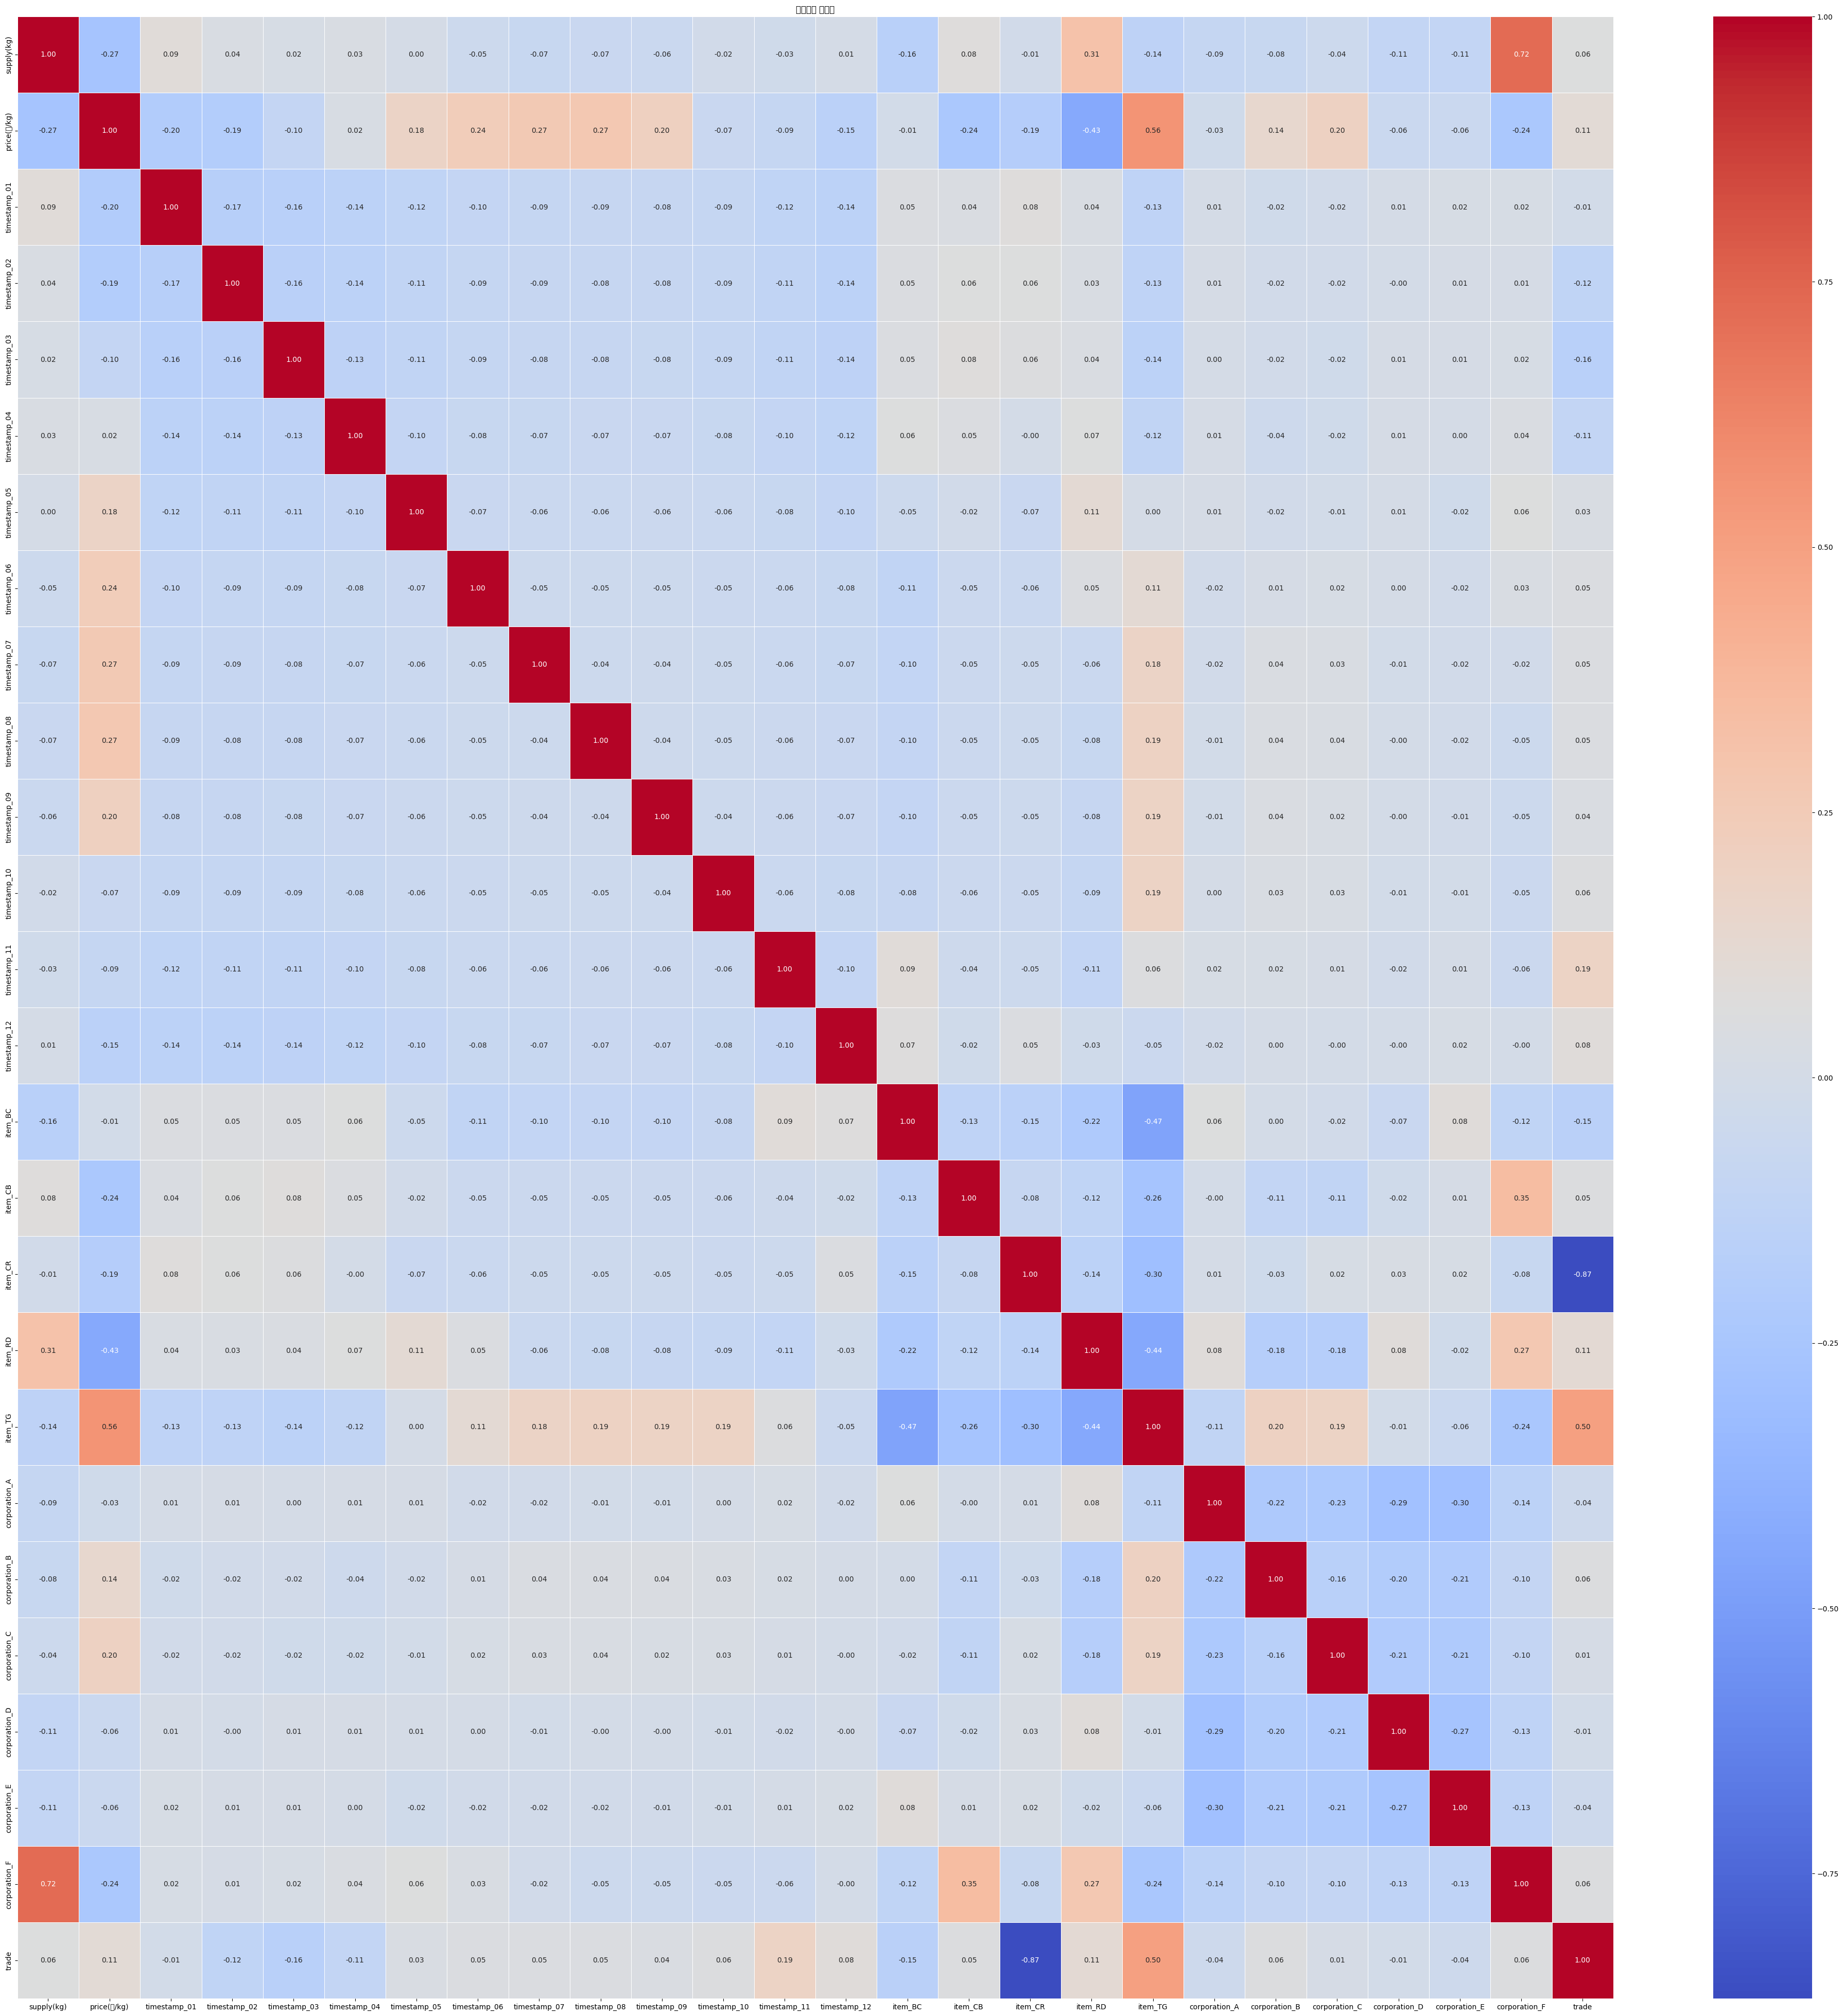

In [114]:
corr_matrix = train.corr()
corr_matrix['price(원/kg)'].sort_values(ascending=True)

# 상관관계 히트맵
import seaborn as sns

plt.figure(figsize=(50, 50))  # 히트맵 크기 설정
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("상관관계 히트맵")
plt.show()

In [127]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(train.drop(columns='price(원/kg)'), train['price(원/kg)'])



LinearRegression()

AttributeError: 'LinearRegression' object has no attribute 'f1_score'

In [140]:
test = pd.read_csv('./test.csv')
# test = test['timestamp'].apply(lambda x: 'timestamp_' + x.split('-')[1])
# test[] = scaler.transform()

In [141]:
data_test = {'timestamp': test['timestamp'].apply(lambda x: x.split('-')[1]),
             'item': test['item'],
             'corporation': test['corporation'],
             'location': test['location']}

df_test = pd.DataFrame(data_test)

# fit_transform이 아닌 transform 사용!
encodedData_test = oneHotEncoder.transform(df_test[['timestamp', 'item', 'corporation', 'location']])
df_test_encoded = pd.DataFrame(encodedData_test, columns=oneHotEncoder.get_feature_names_out(['timestamp', 'item', 'corporation', 'location']))

# test 데이터에 인코딩된 열을 추가
test = pd.concat([test.drop(columns=['timestamp', 'item', 'corporation', 'location']), df_test_encoded], axis=1)

# 결과 확인


In [142]:
test = test.drop(['ID'], axis=1)

In [137]:
test

,timestamp_01,timestamp_02,timestamp_03,timestamp_04,timestamp_05,timestamp_06,timestamp_07,timestamp_08,timestamp_09,timestamp_10,...,item_CB,item_CR,item_RD,item_TG,corporation_A,corporation_B,corporation_C,corporation_D,corporation_E,corporation_F
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1088,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1089,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1090,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [152]:
test

,timestamp_01,timestamp_02,timestamp_03,timestamp_04,timestamp_05,timestamp_06,timestamp_07,timestamp_08,timestamp_09,timestamp_10,...,item_RD,item_TG,corporation_A,corporation_B,corporation_C,corporation_D,corporation_E,corporation_F,location_J,location_S
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1088,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1089,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1090,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [143]:
preds = regression_model.predict(test.to_numpy())

submit = pd.read_csv('./sample_submission.csv')
submit['answer'] = preds
submit.to_csv('./submit.csv',index=False)

/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [144]:
preds

array([ 6.09822899e+15,  6.09822899e+15,  6.09822899e+15, ...,
       -9.15017050e+14, -9.15017050e+14, -9.15017050e+14])

In [151]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
regression_model.fit(train.drop(columns='price(원/kg)'), train['price(원/kg)'])
# 예측
preds = regression_model.predict(train.drop(columns='price(원/kg)'))

# 평가 지표 계산 (예시: MSE, MAE, R² Score)
mse = mean_squared_error(train['price(원/kg)'], preds)
mae = mean_absolute_error(train['price(원/kg)'], preds)
r2 = r2_score(train['price(원/kg)'], preds)

# 결과 출력
print(f"MSE: {mse}, MAE: {mae}, R² Score: {r2}")

MSE: 1703681.9131834225, MAE: 974.6779404393952, R² Score: 0.6912252692443102


In [150]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
regression_model.fit(train.drop(columns=['price(원/kg)', 'trade']), train['price(원/kg)'])
# 예측
preds = regression_model.predict(train.drop(columns=['price(원/kg)', 'trade']))

# 평가 지표 계산 (예시: MSE, MAE, R² Score)
mse = mean_squared_error(train['price(원/kg)'], preds)
mae = mean_absolute_error(train['price(원/kg)'], preds)
r2 = r2_score(train['price(원/kg)'], preds)

# 결과 출력
print(f"MSE: {mse}, MAE: {mae}, R² Score: {r2}")

MSE: 1825478.9183025644, MAE: 1018.7200317433799, R² Score: 0.6691508214430535


In [ ]:

train.drop(columns='price(원/kg)'), train['price(원/kg)']
train.drop(columns='price(원/kg)')

In [153]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(train.drop(columns='price(원/kg)'), train['price(원/kg)'])

# 예측
rf_preds = rf_model.predict(train.drop(columns='price(원/kg)'))

mse = mean_squared_error(train['price(원/kg)'], rf_preds)
mae = mean_absolute_error(train['price(원/kg)'], rf_preds)
r2 = r2_score(train['price(원/kg)'], rf_preds)

# 결과 출력
print(f"MSE: {mse}, MAE: {mae}, R² Score: {r2}")


MSE: 166838.87358557546, MAE: 248.4686465547748, R² Score: 0.9697621792704785


In [156]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# 모델 학습
rf_model.fit(train.drop(columns='price(원/kg)'), train['price(원/kg)'])

# 예측
rf_preds = rf_model.predict(train.drop(columns='price(원/kg)'))

mse = mean_squared_error(train['price(원/kg)'], rf_preds)
mae = mean_absolute_error(train['price(원/kg)'], rf_preds)
r2 = r2_score(train['price(원/kg)'], rf_preds)

# 결과 출력
print(f"MSE: {mse}, MAE: {mae}, R² Score: {r2}")


MSE: 165482.0775196062, MAE: 247.95250383744607, R² Score: 0.9700080845282135


In [159]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, bootstrap=False)

# 모델 학습
rf_model.fit(train.drop(columns='price(원/kg)'), train['price(원/kg)'])

# 예측
rf_preds = rf_model.predict(train.drop(columns='price(원/kg)'))

mse = mean_squared_error(train['price(원/kg)'], rf_preds)
mae = mean_absolute_error(train['price(원/kg)'], rf_preds)
r2 = r2_score(train['price(원/kg)'], rf_preds)

# 결과 출력
print(f"MSE: {mse}, MAE: {mae}, R² Score: {r2}")
preds = rf_model.predict(test.to_numpy())

submit = pd.read_csv('./sample_submission.csv')
submit['answer'] = preds
submit.to_csv('./submit_rf.csv',index=False)

MSE: 59165.51853220545, MAE: 59.02209014737214, R² Score: 0.9892768615353401


/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [158]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=500, random_state=42, bootstrap=False)

# 모델 학습
rf_model.fit(train.drop(columns='price(원/kg)'), train['price(원/kg)'])

# 예측
rf_preds = rf_model.predict(train.drop(columns='price(원/kg)'))

mse = mean_squared_error(train['price(원/kg)'], rf_preds)
mae = mean_absolute_error(train['price(원/kg)'], rf_preds)
r2 = r2_score(train['price(원/kg)'], rf_preds)

# 결과 출력
print(f"MSE: {mse}, MAE: {mae}, R² Score: {r2}")


MSE: 59165.51853220545, MAE: 59.02209014737215, R² Score: 0.9892768615353401


In [154]:
preds = rf_model.predict(test.to_numpy())

submit = pd.read_csv('./sample_submission.csv')
submit['answer'] = preds
submit.to_csv('./submit.csv',index=False)

/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [155]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor 모델 생성
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# 모델 학습
gbr_model.fit(train.drop(columns='price(원/kg)'), train['price(원/kg)'])

# 예측
gbr_preds = gbr_model.predict(train.drop(columns='price(원/kg)'))

# 성능 평가
print(f"MSE: {mean_squared_error(train['price(원/kg)'], gbr_preds)}")
print(f"R²: {r2_score(train['price(원/kg)'], gbr_preds)}")
preds = gbr_model.predict(test.to_numpy())

submit = pd.read_csv('./sample_submission.csv')
submit['answer'] = preds
submit.to_csv('./submit_gbr.csv',index=False)


MSE: 771813.2685572024
R²: 0.8601168255950362


/opt/homebrew/anaconda3/envs/mlclass/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# 모델 학습
xgb_model.fit(X_train, y_train)

# 예측
xgb_preds = xgb_model.predict(X_test)

# 성능 평가
print(f"MSE: {mean_squared_error(y_test, xgb_preds)}")
print(f"R²: {r2_score(y_test, xgb_preds)}")
